## Numerikus integrálás a tóruszon

Ezen az órán a numerikus integrálást (differenciálegyenletek szimulációját) gyakoroljuk. Vegyük a valós időfüggő Ginzburg–Landau egyenletet, amelynek fizikai interpretációjával nem foglalkozunk (ez most egy egyszerűsített forma, "teljes verzióban" szupravezetők leírására használható):

$$\dot q = \nabla^2 q + q - q^3, $$

ahol $q$ alatt egy $q(x,y,t)$ függvényt értünk, $\nabla^2 = \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2}$ a Laplace-operátor. Az integráláshoz az Euler-módszert fogjuk használni, azaz szükségünk lesz minden időpillanatban $q$ deriváltjára, amit a jobb oldalból kaphatunk meg.

A szokásos módon diszkretizálunk, azaz felteszünk egy $h$ oldalú négyzetekből álló rácsot, és ezen oldjuk meg az egyenletet. Emlékezzünk vissza, hogy a második deriváltakra a "centrális" diszkretizáció nagyon kicsi $h$-val így nézett ki:

$$\frac{\partial^2 q}{\partial x^2} \approx \frac{q(x-h,y,t) - 2q(x,y,t) + q(x+h,y,t)}{h^2},$$

ahonnan ugyanezt $y$-ra is felírva

$$\nabla^2 q \approx \frac{1}{h^2} \left(q(x-h,y,t) + q(x+h,y,t) + q(x,y-h,t) + q(x,y+h,t) - 4q(x,y,t)\right)$$

adódik. Azaz $q$-t helyettesíthetjük egy $q_{ij}$ tömbbel, ahol $q_{ij}$ a $q$ értéke az egyes rácspontokban. Legyen a rács $N\times M$-es. A fentiek alapján $q_{ij}$ megváltozása minden időpillanatban

$$\Delta q_{ij} = \frac{1}{h^2}  \left(q_{i-1,j} + q_{i+1,j} + q_{i,j-1} + q_{i,j+1} - 4q_{ij}\right). $$

Tóruszon ez a séma különösen egyszerű. Emlékezzünk vissza, hogy a tóruszt úgy kaptuk, hogy egy papírlap bal szélét a jobb szélével azonosítottuk, majd a felsőt az alsóval. Az esetleges negatív indexeket most is így kezeljük (pl. a vízszintes $-1$ rácspontot $N-1$-gyel azonosítjuk).

Feladatok:
- Valósítsd meg a szimulációt egy $100 \times 100$-as rácson
- Vetítsd $q$-t egy tóruszra a tanult formulákkal

In [1]:
%pylab inline
import torch

Populating the interactive namespace from numpy and matplotlib


In [2]:
N,M  = 100,100
q    = torch.randn(N,M)
h,dt = 2.0,0.05

In [3]:
for i in range(1000):
    ℒ = (torch.roll(q,1,0) + torch.roll(q,-1,0) + torch.roll(q,1,1) + torch.roll(q,-1,1)) - 4*q
    q  += dt*(ℒ/h**2 + q - q**3)

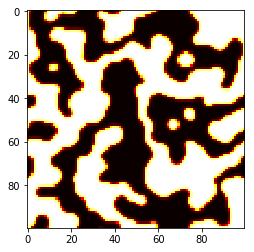

In [4]:
imshow(q,cmap="hot");

In [5]:
R,r = 100,50+q*5
θ,ϕ = np.meshgrid(np.linspace(0,2*np.pi,N),np.linspace(0,2*np.pi,M))

x = (R+r*np.cos(θ))*np.cos(ϕ)
y = (R+r*np.cos(θ))*np.sin(ϕ)
z = r*np.sin(θ)

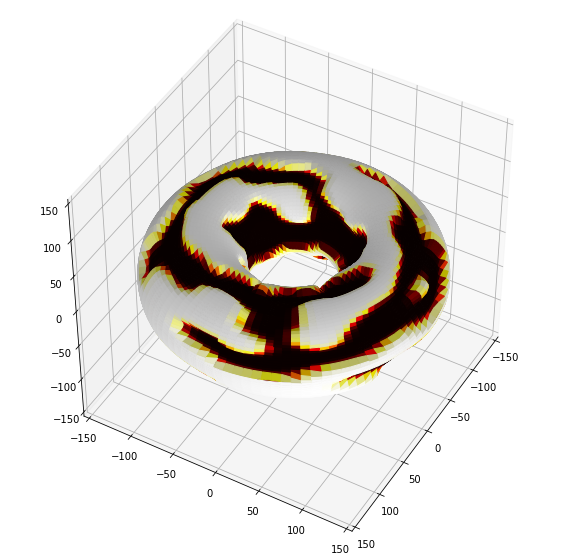

In [6]:
from mpl_toolkits.mplot3d import Axes3D
f  = figure()
f.set_size_inches(10,10)
ax = f.add_subplot(111, projection='3d')
ax.view_init(45,30)
ax.set_xlim(-150,150)
ax.set_ylim(-150,150)
ax.set_zlim(-150,150)
ax.plot_surface(x,y,z,rcount=N,ccount=M,facecolors=cm.hot((q+1)/2));